In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from numpy import asarray
%matplotlib inline

In [3]:
train_data = pathlib.Path("/content/drive/MyDrive/train")
test_data = pathlib.Path("/content/drive/MyDrive/test")

In [4]:
train_image_count = len(list(train_data.glob('*/*')))
print(train_image_count)

840


In [5]:
test_image_count = len(list(test_data.glob('*/*')))
print(test_image_count)

196


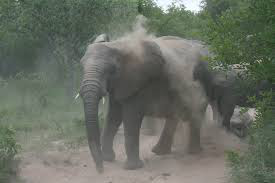

In [6]:
african = list(train_data.glob('African/*'))
PIL.Image.open(str(african[400]))

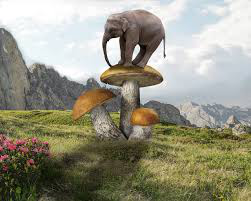

In [7]:
asian = list(train_data.glob('Asian/*'))
PIL.Image.open(str(asian[400]))

In [8]:
train_df = tf.keras.utils.image_dataset_from_directory(train_data, image_size=(180, 180), batch_size=32)

Found 840 files belonging to 2 classes.


In [24]:
test_df= tf.keras.utils.image_dataset_from_directory(test_data, image_size=(180, 180), batch_size=32)

Found 196 files belonging to 2 classes.


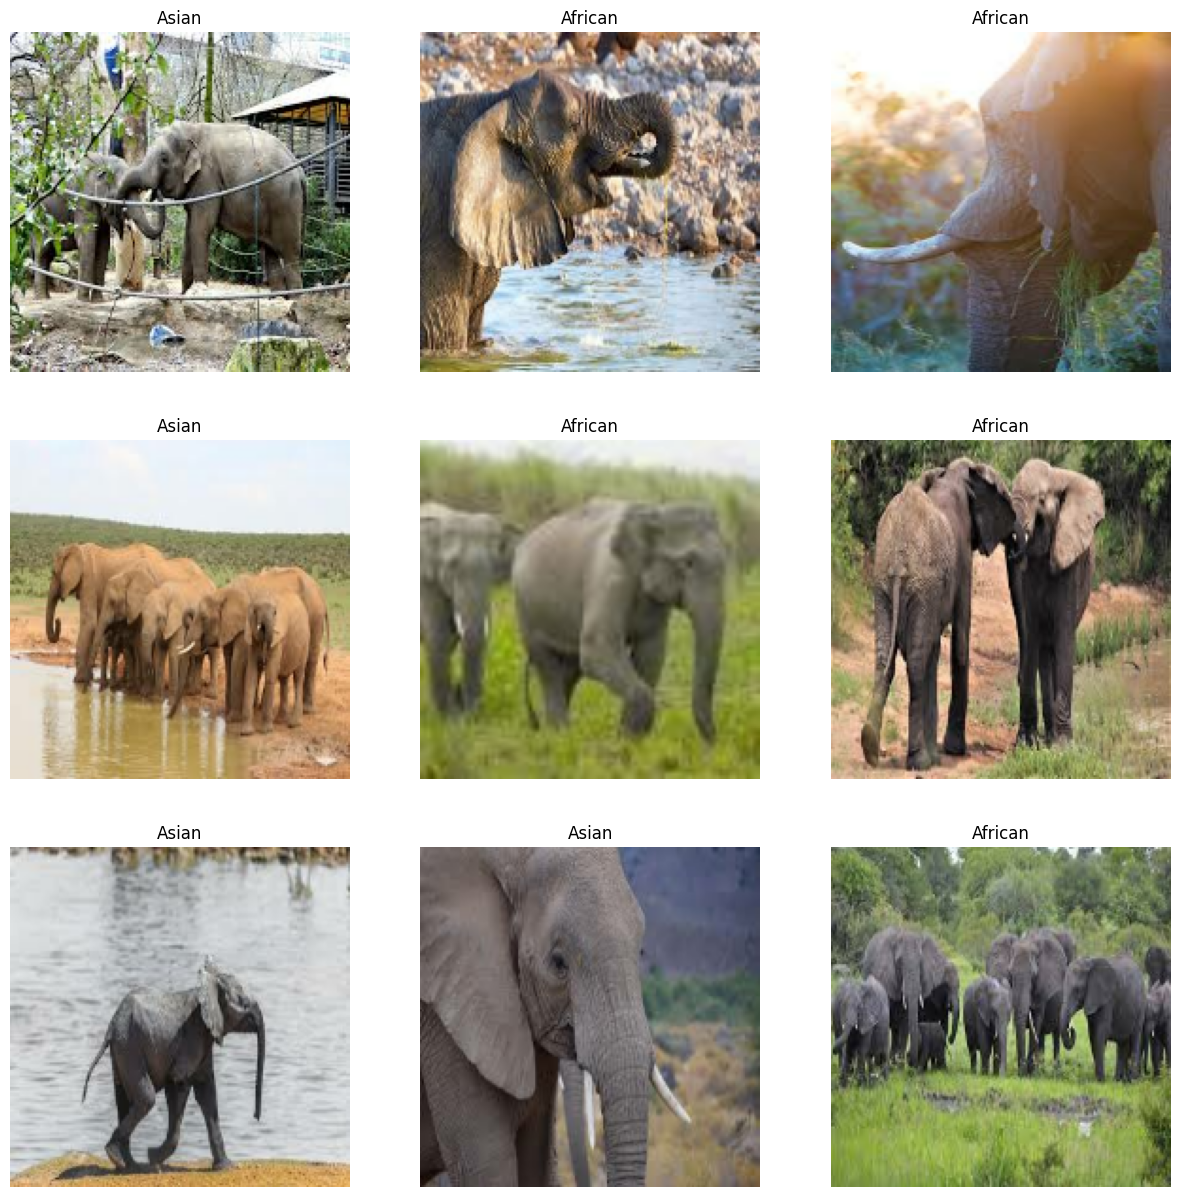

In [9]:
plt.figure(figsize=(15, 15))
for images, labels in train_df.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_df.class_names[labels[i]])
    plt.axis("off")

In [10]:
def my_softmax(z):
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a

In [11]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


In [19]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [20]:
[layer1, layer2, layer3] = model.layers

In [21]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [37]:
tf.random.set_seed(1234)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(180, 180, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(25, activation="relu", name="L1"),
    tf.keras.layers.Dense(15, activation="relu", name="L2"),
    tf.keras.layers.Dense(10, activation="linear", name="L3")
], name="my_model")

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])

history = model.fit(train_df, epochs=40, validation_data=test_df)

Epoch 1/40
27/27 [==============================] - 78s 3s/step - loss: 913.9041 - accuracy: 0.4929 - val_loss: 392.1810 - val_accuracy: 0.5714
Epoch 2/40
27/27 [==============================] - 6s 196ms/step - loss: 614.0736 - accuracy: 0.5286 - val_loss: 237.8509 - val_accuracy: 0.6276
Epoch 3/40
27/27 [==============================] - 5s 161ms/step - loss: 412.8007 - accuracy: 0.5238 - val_loss: 378.3285 - val_accuracy: 0.5102
Epoch 4/40
27/27 [==============================] - 5s 172ms/step - loss: 234.9975 - accuracy: 0.5548 - val_loss: 347.6870 - val_accuracy: 0.5408
Epoch 5/40
27/27 [==============================] - 6s 200ms/step - loss: 345.6050 - accuracy: 0.5869 - val_loss: 444.2839 - val_accuracy: 0.5663
Epoch 6/40
27/27 [==============================] - 4s 147ms/step - loss: 185.5782 - accuracy: 0.6476 - val_loss: 77.6913 - val_accuracy: 0.6378
Epoch 7/40
27/27 [==============================] - 6s 196ms/step - loss: 327.7110 - accuracy: 0.5643 - val_loss: 539.2891 - va

In [108]:
def NNS(Address):
  img = keras.preprocessing.image.load_img(Address, target_size=(180, 180))
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)

  # Preprocess the input image for prediction
  img_preprocessed = keras.applications.vgg16.preprocess_input(img_array)

  # Predict using the model
  predictions = model.predict(img_preprocessed)
  score_asian_percent = predictions[0][0] * 100
  score_african_percent = predictions[0][1] * 100

  # Print the results
  print("Prediction Results:")
  print(f"This image is {score_asian_percent:.2f}% Asian Elephant.")
  print(f"This image is {score_african_percent:.2f}% African Elephant.")

  # Display the test image
  plt.imshow(img)
  plt.axis('off')
  plt.title("Test Image")
  plt.show()

1/1 [==============================] - 1s 682ms/step
Prediction Results:
This image is 27.33% Asian Elephant.
This image is 72.67% African Elephant.


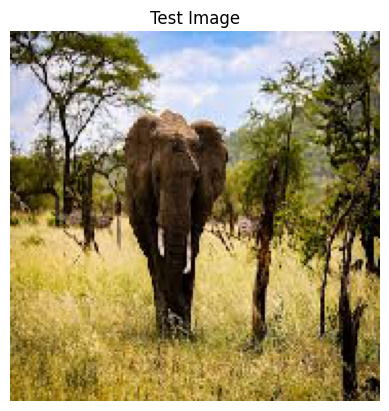

In [109]:
NNS('/content/drive/MyDrive/test/African/af_te30.jpg')

1/1 [==============================] - 0s 465ms/step
Prediction Results:
This image is 98.32% Asian Elephant.
This image is 1.68% African Elephant.


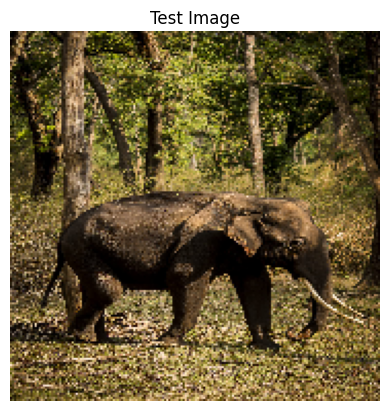

In [111]:
NNS("/content/drive/MyDrive/test/Asian/as_te11.jpg")